# Starbucks Segmentation

**Table of Contents:**
1. [Business Understanding](#business_understanding) 
2. [Data Understanding](#data_understanding)  
3. [Data Preparation](#data_preparation)
4. [Modeling & Evaluation](#modeling_evaluation)
5. [Discussion & Conclusion](#discussion_conclusion)

<a id='business_understanding'></a>
## 1. Business Understanding

Starbucks Corporation is an American coffee company. Today, it operates more than 30,000 retail stores in 80 markets around the world.[[1]](https://www.starbucks.com/about-us/company-information/starbucks-company-profile) The company hence is a big player in a vigorously competitive industry. One approach to retain customers is its [Starbucks Reward Program](https://www.starbucks.com/rewards/). Members of the program receive promotional offers. The company then hopes to use the data collected on its customer behavior to create business value and make data-driven decisions on how it engages with its customers base.

### 1.1. Project Overview
The motivation behind this project is to propose a solution that helps the company in forming a better understanding of its customers base. In this project, an unsupervised learning technique will be used to segment customers and measure how each segment behave during different periods of the test. In particular, [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering will be used. The provided dataset of courses will go through different phases at first before being ready for modeling. Starting with cleaning and ending with the final dataset grouped by customer profiles with their data aggreated. 

Here's a high-level overview of the workflow followed in this project:
1. Define the problem in-hands and measurement criterias.
* Explore, understand, and clean the provided datasets.
* Prepare final dataset grouped by customers.
* Transform final dataset appropriately before fitting model.
* Fit model on final dataset and predict cluster labels.
* Explore distributions among formed clusters.
* Discuss outcomes and make recommendations.

### 1.2. Problem Statement

The company currently promotes products to customers with no prior knowledge of their segments. It is possible hence to analyse the data to find patterns in customer behaviors. This helps the company in aiming and tailoring its marketing efforts and resources to consumers who exhibit similar characteristics and are considered most likely to opt in for business's offerings. This form of target marketing is important because it helps the company by maximizing revenue while maintaining promotional campaigns cost smartly low. To do this, an unsupervised learning technique will be used to cluster customers into groups that can be be investigated separately to better understand their qualities and engage them accordingly.

### 1.3. Measurement Criterias

When speaking about measurement criterias, two categories come to mind; _business metrics_ which assist in making decisions from a business point of view, and _technical metrics_ which assist in making assessment of the implementation of the algorithm used to cluster data.

#### 1.3.1. Business Metrics

All features will be investigated as much as possible, but there are two main themes used drive decisions made in this regard:

`1` Distinguish the difference between how customers behave during non-promotional periods and how they behave when they are prompted to do so during promotionals periods. To measure this, [**R**ecency-**F**requency-**M**onetary Analysis](https://en.wikipedia.org/wiki/RFM_(market_research)) for examining customer value is used. In this model, recency, frequency and monetary values are assigned a score from one to five based on quantiles partition dividing range of values into equal-sized intervals. The RFM score is then obtained by taking the average of all three scores.

$$\textrm{RFM}_{score}={\textrm{recency}_{score}+\textrm{frequency}_{score}+\textrm{monetary}_{score}\over3}$$ 

`2` Identify which customers react preferably to which types of offers. To measure this, offer view and completion rates will be used where the cardinalities of corresponding sets are divided by cardinalities of relevant sets.

$$\textrm{view rate}={n(\textrm{offer viewed})\over{n(\textrm{offer received})}}\;\;\;\;\;\;\;\;\textrm{completion rate}={n(\textrm{offer completed})\over{n(\textrm{offer viewed})}}$$

#### 1.3.1. Technical Metrics

For the algorithm chosen in this problem, K-Means, two appropriate methods will be used find the optimal number of clusters $k$ and to assess the model implementations; silhouette coefficient (SC) analysis and within-cluster Sum of Squared Errors (SSE) analysis.

`1` Silhouette Coefficient (SC) analysis is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for k during k-means clustering. Silhouette values lies in the range of [-1, 1]. A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned. Similarly, value of -1 indicates that the point is close to its neighboring cluster than to the cluster its assigned. And, a value of 0 means at the boundary of the distance between the two cluster. Value of +1 is ideal and -1 is least preferred. Hence, higher the value better is the cluster configuration. [[2]](https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/)

Mathematically, for one data point $i$ where $a(i)$ represents the calculated mean distance of point $i$ with regard to to all other points in the cluster it was assigned and $b(i)$ represents the calculated mean distance of point $i$ with regard to to all points in its closest neighboring cluster, silhouette is defined:

$$s(i)={b(i)-a(i)\over\textrm{max}\{b(i),a(i))\}}$$

Therefore, it is clear from the above equation that $$-1\leq{s(i)}\leq1$$

Then, for one value representing the silhouette score that used for assessment of clustering outcomes, where $\bar{s}(k)$ represents the mean $s(i)$ over all data of the entire dataset for a specific number of clusters $k$, silhouette coefficient is defined:

$$SC=\textrm{max}_k\{\bar{s}(k)\}$$

`2` Sum of Squared Errors (SSE) analysis is a way to measure variability (dispersion) within a cluster by taking the sum of the squared differences between each data point and its cluster's mean, and therefore defined where $x_i$ is the $i$th data point and $n$ is the total number of data points: [[3]](https://hlab.stanford.edu/brian/error_sum_of_squares.html)

$$SSE=\sum_{i=1}^{n}x_i^2-{1\over{n}}\Bigg(\sum_{i=1}^{n}x_i^2\Bigg)^2$$

SSE tends to decrease toward 0 as $k$-value increase because then each data point is its own cluster and there is no error between it and the mean of its cluster. The elbow method is then applied by plotting SSE for a range of $k$-values where where one should choose a $k$-value after which variability starts to have diminishing returns. [[4]](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)

<a id='data_understanding'></a>
## 2. Data Understanding

This data set contains simulated data that mimics customer behavior on the Starbucks Rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink (informational) or an actual offer such as a discount or BOGO (buy one get one free). This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

The data is contained in three files mentioned below in brief and will be discussed in details later.

* `data/portfolio.json` - containing meta data about the promotions offered by the company.
* `data/profile.json` - demographic data about members enrolled in the reward program.
* `data/transcript.json` - records for transactions, offers received, offers viewed, and offers completed

In [1]:
import sys
sys.path.insert(0, 'utilities.py')
import utilities as util
import json
import time
import warnings
warnings.filterwarnings("ignore")


from IPython.display import display
import pandas as pd
import numpy as np 
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

import matplotlib.cbook as cbook
#% matplotlib inline
plt.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
# Read in the json files

portfolio = pd.read_json('my_data1/portfolio.json', orient='records', lines=True)
profile = pd.read_json('my_data1/profile.json', orient='records', lines=True)
transcript = pd.read_json('my_data1/transcript.json', orient='records', lines=True)

### 2.1. `portfolio` Dataset

**Schema:**  
0. `id` (str) - offer id
* `offer_type` (str) - type of offer; bogo, discount, or informational
* `difficulty` (int) - minimum required to be spent to complete an offer
* `reward` (int) - reward given for completing an offer
* `duration` (int) - time in days for an offer to be open
* `channels` (list) - communication channels used to market an offer.

In [3]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [5]:
util.compute_null_pct(portfolio)

    column  count  pct
    reward      0  0.0
  channels      0  0.0
difficulty      0  0.0
  duration      0  0.0
offer_type      0  0.0
        id      0  0.0


**Conclusion:**

This dataset contains meta data about promotions offered by the company. Every offer has a minimum required to be spent by a customer to complete an offer represented by `difficulty` and therfore be eligible for the `reward`. Also, every offer has a validity period represented by `duration` after which it expires.

The above is true for offers with offer type "bogo" and "discount". However, for "informational" offers while they have a `duration`, their `difficulty` and `reward` are zero since these offers are merely providing information about a product. This means they are not tracked for completion in `transcript`.

There are 10 rows (representing 10 types of offers) and 6 columns with no missing or null values. Very little cleaning will be performed on this dataset.

### 2.2. `profile` Dataset

**Schema:**
0. `age` (int) - age of the customer 
* `became_member_on` (int) - date when customer created an app account
* `gender` (str) - gender of the customer; M, F, or O.
* `id` (str) - customer id
* `income` (float) - income of customer

In [6]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
util.compute_null_pct(profile)

          column  count   pct
          gender   2175 12.79
             age      0  0.00
              id      0  0.00
became_member_on      0  0.00
          income   2175 12.79


In [9]:
profile[profile.gender.isnull()].head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN
10,None,118,c4863c7985cf408faee930f111475da3,20170824,NaN
11,None,118,148adfcaa27d485b82f323aaaad036bd,20150919,NaN
17,None,118,744d603ef08c4f33af5a61c8c7628d1c,20170801,NaN
23,None,118,2b826eba31074a059d63b0ae8f50b7d5,20170907,NaN


In [10]:
util.compute_null_pct(profile[profile.gender.isnull() & profile.income.isnull()])

          column  count   pct
          gender   2175 100.0
             age      0   0.0
              id      0   0.0
became_member_on      0   0.0
          income   2175 100.0


In [11]:
util.compute_null_pct(profile[profile.age == 118])

          column  count   pct
          gender   2175 100.0
             age      0   0.0
              id      0   0.0
became_member_on      0   0.0
          income   2175 100.0


In [12]:
count_118 = (profile['age'] == 118).sum()
count_118

np.int64(2175)

**So, from this we can conclude that, whenever the age is 118 both income and gender are missing**

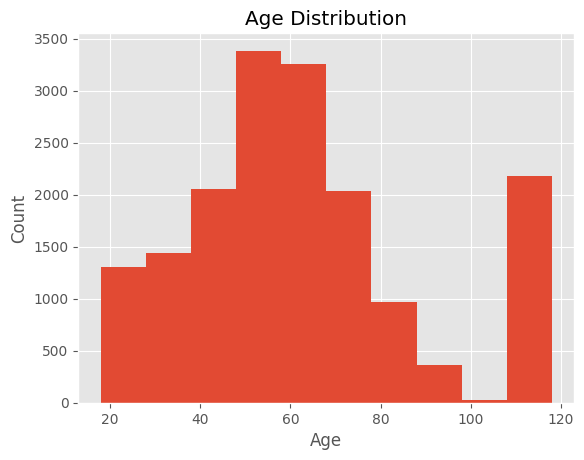

In [13]:
plt.hist(profile.age);
plt.title('Age Distribution')

plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

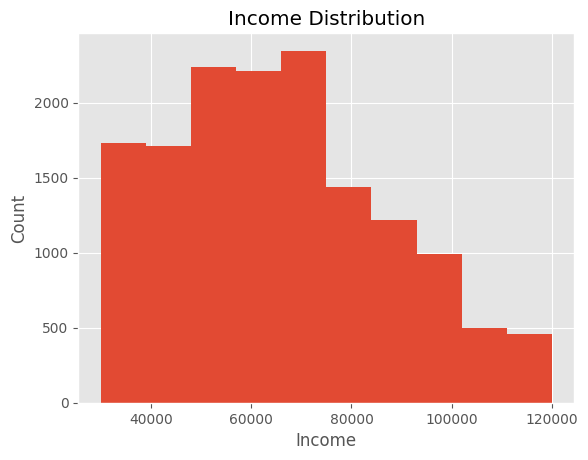

In [14]:
plt.hist(profile.income);
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [15]:
profile.gender.value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

#### Conclusion:

This dataset contains demographic data about members enrolled in the reward program with self-explanatory features. There are 17,000 rows (representing 17,000 customer profiles) and 5 columns. There are 2175 rows with missing values, incosistent data and clear outliers. Aside from that, very little cleaning is required on this dataset.

### 2.2. `transcript` Dataset

**Schema:**
* `event` (str) - record description; transaction, offer received, offer viewed, or offer completed.
* `person` (str) - customer id.
* `time` (int) - time in hours since start of test. The data begins at time t=0.
* `value` - (dict) - either an offer id or transaction amount depending on the record.

In [16]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


In [17]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [18]:
transcript.event.value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [19]:
transcript.loc[transcript.event == 'transaction'].value.head()

12654    {'amount': 0.8300000000000001}
12657                 {'amount': 34.56}
12659                 {'amount': 13.23}
12670                 {'amount': 19.51}
12671                 {'amount': 18.97}
Name: value, dtype: object

In [20]:
transcript.loc[transcript.event == 'offer received'].value.head()


0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [21]:
transcript.loc[transcript.event == 'offer viewed'].value.head()


12650    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
Name: value, dtype: object

In [22]:
transcript.loc[transcript.event == 'offer completed'].value.head()


12658    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679    {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

In [23]:
transcript.loc[transcript.person == '68213b08d99a4ae1b0dcb72aebd9aa35']

,person,event,value,time
12623,68213b08d99a4ae1b0dcb72aebd9aa35,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
29490,68213b08d99a4ae1b0dcb72aebd9aa35,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},42
62930,68213b08d99a4ae1b0dcb72aebd9aa35,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},168
163344,68213b08d99a4ae1b0dcb72aebd9aa35,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},408
167618,68213b08d99a4ae1b0dcb72aebd9aa35,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},408
200082,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 0.48},492
209759,68213b08d99a4ae1b0dcb72aebd9aa35,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},504
230408,68213b08d99a4ae1b0dcb72aebd9aa35,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},528
254874,68213b08d99a4ae1b0dcb72aebd9aa35,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714


In [24]:
#test period 

print(f'{transcript.time.max()} hours')
print(f'{transcript.time.max()/24} days')


714 hours
29.75 days


**Conclusion:**

This dataset contains records of activities related to the test simulated. Each record is time-stamped since the start of the test. The test start at t=0 and ends at t=714 (≈ 30 days). The nature of each record is described using `event`. The `value` column holds a value based on the `event` column. For offer received, viewed, and completed, the offer id is recorded. For transaction, the amount is recorded. Although this dataset is somehow abstract, 306534 rows and 4 columns, most of the cleaning process will be performed on this dataset.

<a id='data_preparation'></a>
## 3. Data Preparation

In this section, different compantions of techniques will be performed to produce the final dataset ready for modeling next section. Starting with cleaning the provided datasets, and then merging and aggregating data to form the final dataset. The final dataset will be grouped by customers profiles. The diagram below provide a high-level overview of the workflow followed in this project to produce final dataframe `coe` which stands for **C**ustomer-**O**ffer **E**ngagement.

<img src="images/workflow.png" style="margin: 10px 0px"/>
<center>Figure 1: Overview of Dataframes Manipulation</center>

### 3.1. Data Cleaning

#### 3.1.1. `portfolio` Dataset

Starting be renaming columns `id` and `reward` to `offer_id` and `offered_reward` respectively. This serves readability. The latter in particular to make it distinguishable from a later added column `redeemed_reward`. 

In [25]:
portfolio.head(2)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


In [26]:
# Rename specified columns
portfolio.rename(columns={
    'id': 'offer_id',
    'reward': 'offered_reward'}, inplace=True)

In [27]:
portfolio.head(2)

,offered_reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


One-hot encoding for columns `channels` and `offer_type` using utility function `one_hot_encoder`.

In [28]:
print(portfolio.head())

   offered_reward                      channels  difficulty  duration  \
0              10       [email, mobile, social]          10         7   
1              10  [web, email, mobile, social]          10         5   
2               0          [web, email, mobile]           0         4   
3               5          [web, email, mobile]           5         7   
4               5                  [web, email]          20        10   

      offer_type                          offer_id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  


In [29]:
# One-hot encode `channel` column
portfolio = util.one_hot_encoder(
    df = portfolio,
    target_column = 'channels',
    categories = ['web','email','mobile','social'],
    prefix = 'channel')

# One-hot encode `offer_type` column
portfolio = util.one_hot_encoder(
    df = portfolio,
    target_column = 'offer_type',
    categories = ['discount','bogo','informational'],
    prefix = 'type')

Convert `offer_id` to integers, again for readability, while retaining the mapping dictionary later used to map offer ids in `transcript`. All done with help of utility function `label_encoder`.

In [30]:
# Convert `offer_id` to integers
portfolio, offer_id_dict = util.label_encoder(
    df = portfolio,
    target_column = 'offer_id',
    start = 1,
    step = 1)

In [31]:
offer_id_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [32]:
portfolio.head()

,offered_reward,difficulty,duration,offer_id,channel_web,channel_email,channel_mobile,channel_social,type_discount,type_bogo,type_informational
0,10,10,7,1,0,1,1,1,0,1,0
1,10,10,5,2,1,1,1,1,0,1,0
2,0,0,4,3,1,1,1,0,0,0,1
3,5,5,7,4,1,1,1,0,0,1,0
4,5,20,10,5,1,1,0,0,1,0,0


In [33]:
util.compute_null_pct(portfolio)

            column  count  pct
    offered_reward      0  0.0
        difficulty      0  0.0
          duration      0  0.0
          offer_id      0  0.0
       channel_web      0  0.0
     channel_email      0  0.0
    channel_mobile      0  0.0
    channel_social      0  0.0
     type_discount      0  0.0
         type_bogo      0  0.0
type_informational      0  0.0


#### 3.1.2. `profile` Dataset

Rename `id` column to `customer_id`

In [34]:
profile.rename(columns={'id': 'customer_id'}, inplace=True)

Convert `became_member_on` column to standard `datetime` object. This will be used then to add calculated `days_member` column and then dropped. 

In [35]:
# Convert `became_member_on` to standard `datetime` object
profile.became_member_on = pd.to_datetime(profile.became_member_on, format='%Y%m%d')



In [36]:
profile['days_member'] = (pd.to_datetime('today') - profile['became_member_on']).dt.days


In [37]:
profile['days_member']

0        3099
1        2946
2        2584
3        3013
4        2926
         ... 
16995    2622
16996    2583
16997    3116
16998    3441
16999    2939
Name: days_member, Length: 17000, dtype: int64

In [38]:
# Drop `became_member_on`
profile.drop(columns='became_member_on', inplace=True)

In regards to the 2175 profiles with missing values discussed earlier, the decision was to simply drop them. Also, dropping 212 profiles with 'other' gender. This to make it much easier to just remap 'male' and 'female' gender with binary values in one column. It's important to retain their ids in order to later remove corresponding activies in `transcript`.

In [39]:
# copy coy customer id of rows to be removed so that we can remove other rows with same customer id
customers_removed = profile.loc[(profile.age == 118) | (profile.gender == 'O'), 'customer_id'].to_list()
# Remove rows with `age` == 118 or `gender` == 'O'
print(f'Removing {len(customers_removed)}')

Removing 2387


In [40]:
#remove customers with customer id in customers_removed
profile = profile[~profile.customer_id.isin(customers_removed)]
print(f'Total remains same {len(customers_removed)+len(profile)}  customers with age')

Total remains same 17000  customers with age


Now `gender` column is converted to a binary column

In [41]:
profile.gender = profile.gender.map({
    'F': 0,
    'M': 1,
})

Convert `customer_id` to integers, again for readability, while retaining the mapping dictionary later used to map customer ids in `transcript`. All done with help of utility function `label_encoder`.

In [42]:
# Convert `customer_id` to integers
profile, customer_id_dict = util.label_encoder(
    df = profile,
    target_column = 'customer_id',
    start = 1,
    step = 1)

In [43]:
# Preview 5 element
dict(list(customer_id_dict.items())[0:5])

{'0610b486422d4921ae7d2bf64640c50b': 1,
 '78afa995795e4d85b5d9ceeca43f5fef': 2,
 'e2127556f4f64592b11af22de27a7932': 3,
 '389bc3fa690240e798340f5a15918d5c': 4,
 '2eeac8d8feae4a8cad5a6af0499a211d': 5}

In [44]:
profile.head()

,gender,age,customer_id,income,days_member
1,0,55,1,112000.0,2946
3,0,75,2,100000.0,3013
5,1,68,3,70000.0,2661
8,1,65,4,53000.0,2737
12,1,58,5,51000.0,2827


In [45]:
util.compute_null_pct(profile)

     column  count  pct
     gender      0  0.0
        age      0  0.0
customer_id      0  0.0
     income      0  0.0
days_member      0  0.0


#### 3.1.2. `transcript` Dataset

Rename `person` column to `customer_id`

In [46]:
# Rename `person` column to `customer_id`
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

Drop rows with `customer_id` corresponding to deleted users in `profile`.

In [47]:
# Drop rows with `customer_id` corresponding to deleted users in `profile`
transcript = transcript[transcript.customer_id.isin(customers_removed) == False]

Map `customer_id` with previously created `customer_id_dict`

In [48]:
# Map `customer_id` with previously created `customer_id_dict`
transcript.customer_id = transcript.customer_id.apply(lambda x: customer_id_dict[x])

To deal with `value` column, two new columns are created. `value_type` and `actual_value`. Their entries are derived by applying a function along each row to extract and hence separate data. Original `value` column is then dropped.  

In [49]:
# Add column `value_type`
transcript['value_type'] = transcript.value.apply(lambda x : list(x.keys())[0])

# Add column `actual_value`
transcript['actual_value'] = transcript.value.apply(lambda x : list(x.values())[0])

# Drop `value` column
transcript.drop(columns='value', inplace=True)

In [50]:
transcript.head(2)


,customer_id,event,time,value_type,actual_value
0,2,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,3,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5


In [51]:
transcript.tail(2)

,customer_id,event,time,value_type,actual_value
306531,14598,transaction,714,amount,3.61
306532,14604,transaction,714,amount,3.53


Split `transcript` dataset into offers and transactions to work on each separately. 

In [52]:
# Split `transcript` dataset into offer and transaction
offers_df = transcript[transcript['event'] != 'transaction']
transactions_df = transcript[transcript['event'] == 'transaction']

Now, column `actual_value` can be renamed in each dataframe accordingly. In `offers_df` will be renamed to `offer_id`, and in `transactions_df` will be renamed to `amount`.

In [53]:
# Rename columns
offers_df.rename(columns={'actual_value': 'offer_id'}, inplace=True)
transactions_df.rename(columns={'actual_value': 'amount'}, inplace=True)

Due to this split, some coulmns are no longer needed. `value_type` in `offers_df`. `event` and `value_type` in `transactions_df`. These columns are to be dropped.  the `value` column was separated

In [54]:
# Drop unnecessary columns
offers_df.drop(columns='value_type', inplace=True)
transactions_df.drop(columns=['value_type', 'event'], inplace=True)

Now, it is possible to map `offer_id` in  `offers_df` with previously created `offer_id_dict`.

In [55]:
# Map `offer_id` with previously created `offer_id_dict`
offers_df.offer_id = offers_df.offer_id.apply(lambda x: offer_id_dict[x])


In [56]:
offers_df.head()


,customer_id,event,time,offer_id
0,2,offer received,0,4
2,3,offer received,0,10
5,4,offer received,0,9
7,5,offer received,0,3
8,6,offer received,0,5


In [57]:
util.compute_null_pct(offers_df)

     column  count  pct
customer_id      0  0.0
      event      0  0.0
       time      0  0.0
   offer_id      0  0.0


In [58]:
transactions_df.head()

,customer_id,time,amount
12654,28,0,0.83
12657,39,0,34.56
12659,45,0,13.23
12670,107,0,19.51
12671,123,0,18.97


In [59]:
util.compute_null_pct(transactions_df)

     column  count  pct
customer_id      0  0.0
       time      0  0.0
     amount      0  0.0


### 3.2. Data Preprocessing

Now that the four dataframes, `portfolio`, `profile`, `offers_df`, and `transactions_df` are cleaned. The process of merging and aggregating data can proceed.

The first step is merge `portfolio` to `offers_df`. 

In [60]:
# Merge `portfolio` to `offers_df`
offers_df = pd.merge(offers_df, portfolio, on='offer_id')


In [61]:
offers_df.head()


,customer_id,event,time,offer_id,offered_reward,difficulty,duration,channel_web,channel_email,channel_mobile,channel_social,type_discount,type_bogo,type_informational
0,2,offer received,0,4,5,5,7,1,1,1,0,0,1,0
1,3,offer received,0,10,2,10,7,1,1,1,0,1,0,0
2,4,offer received,0,9,5,5,5,1,1,1,1,0,1,0
3,5,offer received,0,3,0,0,4,1,1,1,0,0,0,1
4,6,offer received,0,5,5,20,10,1,1,0,0,1,0,0


Three dataframes are then created based on `event`.

In [62]:
# Split `offers_df` based on `event`
received_df = offers_df[offers_df['event']=='offer received']
viewed_df = offers_df[offers_df['event']=='offer viewed']
completed_df = offers_df[offers_df['event']=='offer completed']

To keep things clean, new auxiliary dataframe `aux_df` is created as a copy of `received_df` which will be the workspace for all preprocessing steps. Many of the columns created in this dataframe will not make it to the final dataframe grouped by customer profiles but they are useful in logical operations.

In [63]:
#creating a temp_df : a copy of received_df
temp_df = received_df.copy()

Since `aux_df` is nothing but a copy of `received_df`. Simply the `event` column which only contains the value ‘offer_recieved’ can be renamed to `offer_recieved` with a value of 1.

In [64]:
temp_df

,customer_id,event,time,offer_id,offered_reward,difficulty,duration,channel_web,channel_email,channel_mobile,channel_social,type_discount,type_bogo,type_informational
0,2,offer received,0,4,5,5,7,1,1,1,0,0,1,0
1,3,offer received,0,10,2,10,7,1,1,1,0,1,0,0
2,4,offer received,0,9,5,5,5,1,1,1,1,0,1,0
3,5,offer received,0,3,0,0,4,1,1,1,0,0,0,1
4,6,offer received,0,5,5,20,10,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130426,14576,offer received,576,1,10,10,7,0,1,1,1,0,1,0
130427,14608,offer received,576,10,2,10,7,1,1,1,0,1,0,0
130428,14609,offer received,576,6,3,7,7,1,1,1,1,1,0,0
130429,14612,offer received,576,1,10,10,7,0,1,1,1,0,1,0


Since `aux_df` is nothing but a copy of `received_df`. Simply the `event` column which only contains the value ‘offer_recieved’ can be renamed to `offer_recieved` with a value of 1.

In [65]:
# Rename `event` to `offer_received` in `aux_df`
temp_df.rename(columns={'event': 'offer_received'}, inplace=True)
temp_df.offer_received = 1

In `aux_df`, two new columns will serve as the base for all logical tests later. `offer_start_time` which is nothing but the already existing `time` column. Hence, `time` will be renamed to `offer_start_time`. The other one is `offer_end_time` which can be easily obtained by adding the offer `duratin` (in hours) to `offer_start_time`.

In [66]:
# Rename `time` to `offer_start_time` and add `offer_end_time`
temp_df.rename(columns={'time': 'offer_start_time'}, inplace=True)
temp_df['offer_end_time'] = temp_df.offer_start_time + temp_df.duration * 24

Now that the start and end time for each offer received in `aux_df` are present, a utility function `get_offer_engagements` will be applied along each row. This function takes other dataframes (`viewed_df`, `completed_df`, `transactions_df`) and extract necessary data. The function then returns a list in the form of [`offer_viewed_time`, `offer_completed_time`]. If any was missing or invaild, returns NaN in its corresponding place inside the list. Then, another utility function `expand_list_to_columns` is used to expand the output value returnd into separate columns.

It is important here to go over the assumption programmed into the function `get_offer_engagements` for a view or completion time to be valid.

An offer is considered _**viewed**_ only if done so after it has been received and during offer's duration. That means the conditions for a valid view time:  
1. `offer_viewed_time >= offer_start_time`, and
2. `offer_viewed_time <= offer_end_time`
    
An offer is considered _**completed**_ depending on the offer type:
* For bogo and discount offers, `completed_df` dataframe is used extract necessary info. The completion time must be after the time it has been viewed and during offer's duration. That means the conditions for a valid complete time in this case:
    1. `offer_completed_time >= offer_viewed_time`, and
    2. `offer_completed_time <= offer_end_time`


* For informational offers, `transactions_df` is used to extract necessary info. The way completion for informational offers is measured is by checking if the customer has made any transaction after viewing the offer and in offer's duration which assumed earlier to be the period of influence. That means the conditions for a valid complete time in this case:
    1. `transaction_time >= offer_viewed_time`, and
    2. `transaction_time <= offer_end_time`

In [67]:
temp_df.columns

Index(['customer_id', 'offer_received', 'offer_start_time', 'offer_id',
       'offered_reward', 'difficulty', 'duration', 'channel_web',
       'channel_email', 'channel_mobile', 'channel_social', 'type_discount',
       'type_bogo', 'type_informational', 'offer_end_time'],
      dtype='object')

In [68]:
import time
start = time.time()
util.get_offer_engagements(temp_df.iloc[0], viewed_df, completed_df, transactions_df)
print("Single row processing time:", (time.time() - start)*65585, "seconds")



Single row processing time: 235.61353206634521 seconds


In [69]:
len(temp_df)

65585

In [70]:
# Add empty object column to store `output_value` list of function
temp_df['output_value'] = ''

# Apply u.get_offer_engagements to each row
temp_df.output_value = temp_df.apply(
    lambda x: util.get_offer_engagements(x, viewed_df, completed_df, transactions_df), axis=1)



In [71]:
# Expand `output_value` list to columns
temp_df = util.expand_list_to_columns(temp_df, 'output_value', {
    0: 'offer_viewed_time',
    1: 'offer_completed_time'})

In [72]:
temp_df[['offer_start_time', 'offer_end_time', 'offer_viewed_time', 'offer_completed_time']].head(15)

,offer_start_time,offer_end_time,offer_viewed_time,offer_completed_time
0,0,168,6.0,132.0
1,0,168,18.0,NaN
2,0,120,0.0,60.0
3,0,96,NaN,NaN
4,0,240,18.0,NaN
5,0,240,150.0,NaN
6,0,168,102.0,NaN
7,0,96,18.0,18.0
8,0,240,30.0,30.0
9,0,240,18.0,126.0


One feature that will be added is `response_score` which measures how fast a customer responded to an offer once viewed. The score is normalized using offer's duration and range from 0 to 1. The higher the score, the faster responsivity to an offer.

In [73]:
# Add `response_score` column

temp_df['response_score'] = (
    temp_df.offer_completed_time -
    temp_df.offer_viewed_time).apply(
    lambda x: x if x >= 0 else np.nan)

temp_df.response_score = np.round(((
    (temp_df.duration * 24) - temp_df.response_score) /
    (temp_df.duration * 24)), 2).fillna(0)

In [74]:
temp_df[['offer_viewed_time', 'offer_completed_time', 'response_score']].head(15)


,offer_viewed_time,offer_completed_time,response_score
0,6.0,132.0,0.25
1,18.0,NaN,0.00
2,0.0,60.0,0.50
3,NaN,NaN,0.00
4,18.0,NaN,0.00
5,150.0,NaN,0.00
6,102.0,NaN,0.00
7,18.0,18.0,1.00
8,30.0,30.0,1.00
9,18.0,126.0,0.55


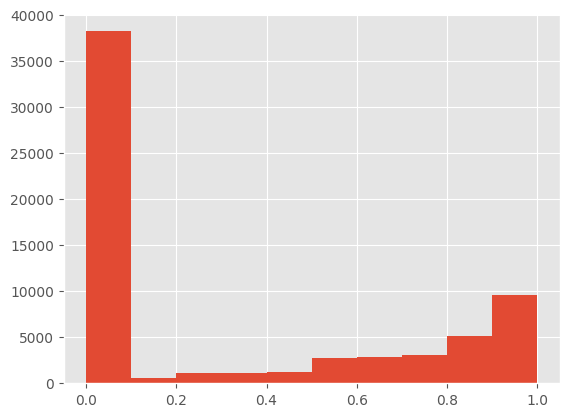

In [75]:
temp_df.response_score.hist();


Since the view and compeltion time is now present, two new columns `offer_viewed` and `offer_completed` with binery values will be added.


In [76]:
# Add `offer_viewed` and `offer_completed` columns with binery values
temp_df['offer_viewed'] = temp_df.offer_viewed_time.apply(lambda x: 0 if pd.isnull(x) else 1)
temp_df['offer_completed'] = temp_df.offer_completed_time.apply(lambda x: 0 if pd.isnull(x) else 1)


In [77]:

temp_df[['offer_viewed_time', 'offer_completed_time', 'offer_viewed', 'offer_completed']].head()


,offer_viewed_time,offer_completed_time,offer_viewed,offer_completed
0,6.0,132.0,1,1
1,18.0,NaN,1,0
2,0.0,60.0,1,1
3,NaN,NaN,0,0
4,18.0,NaN,1,0


New `redeemed_reward` columns is added by simply multiplying `offered_reward` by `offer_completed`.

In [78]:
# Add `redeemed_reward` columns
temp_df['redeemed_reward'] = temp_df.offered_reward * temp_df.offer_completed

To make things clean, three temprary (dummy) dataframes are created. Named `alpha_df`, `beta_df`, and `gamma_df`. In the first two, selection of columns are used and aggregated by sum and mean respectively. In the last, utility function `split_columns_by_offer_type` is used on a selection of columns to aggregate data by offer type.

In [79]:
# Create dummy dataframes each with different selection of columns and aggregator

alpha_df = temp_df[[
    'customer_id',
    'offer_received',
    'offer_viewed',
    'offer_completed',
    'channel_web',
    'channel_email',
    'channel_mobile',
    'channel_social',
    ]].groupby('customer_id', as_index=True).sum().fillna(0)

beta_df = temp_df[[
    'customer_id',
    'difficulty',
    'duration',
    'offered_reward',
    'redeemed_reward',
    'response_score',
    ]].groupby('customer_id', as_index=True).mean().fillna(0)

gamma_df = util.split_columns_by_offer_type(temp_df, [
    'offer_received',
    'offer_viewed',
    'offer_completed',
    'response_score',
    ])

Now, creating the final datframe `coe` which will be used for modeling by megring the above dataframes `alpha_df`, `beta_df`, and `gamma_df` to `profile`.


In [80]:
# Create the final dataset `coe`
coe = pd.merge(profile.set_index('customer_id'), alpha_df, left_index=True, right_index=True)
coe = pd.merge(coe, beta_df, left_index=True, right_index=True)
coe = pd.merge(coe, gamma_df, left_index=True, right_index=True)

coe.reset_index(inplace=True)

In this step below, sets of new features will be added using utility function `get_transactions_allotment` that will be helpful in measuring the two main points discussed in _problem statement_. The nomenclature for these features is as follows:

* Prefixes
    * `txn_`: Count of transactions.
    * `amt_`: Sum of amount.
    * `recency_`: Time of most recent transaction.
    * `frequency_`: Average time in hours between transactions.
    * `monetary_`: Average amount per transaction.
* Suffixes
    * `_overall`: Anytime during the test period.
    * `_promo`: During offer durations (regardless of view or completion).
    * `_nonpromo`: In-between (outside) offers durations

The set of `frequency_`, `recency_`, and `monetary_` features is necessary to calculate the RFM score. This [article](https://clevertap.com/blog/rfm-analysis/) was a nice guide in doing so.

In [81]:
# Add empty object column to store `output_value` list of function
coe['output_value'] = ''

# Apply u.get_transactions_allotment to each row
coe.output_value = coe.apply(
    lambda x: util.get_transactions_allotment(x, temp_df, transactions_df), axis=1)

# Expand `output_value` list to columns
coe = util.expand_list_to_columns(coe, 'output_value', {
    0: 'txn_overall',
    1: 'amt_overall',
    2: 'txn_promo',
    3: 'amt_promo',
    4: 'txn_nonpromo',
    5: 'amt_nonpromo',
    6: 'recency_promo',
    7: 'recency_nonpromo'})

# Add remaining required components for RFM score
coe['monetary_promo'] = np.round(coe.amt_promo / coe.txn_promo, 2)
coe['monetary_nonpromo'] = np.round(coe.amt_nonpromo / coe.txn_nonpromo, 2)

coe['frequency_promo'] = np.round(coe.recency_promo / coe.txn_promo, 2)
coe['frequency_nonpromo'] = np.round(coe.recency_nonpromo / coe.txn_promo, 2)

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.